In [123]:
import math
import matplotlib.pyplot as plt
import control as ct
import re

### Coleta dados dos arquivos txt

#### Analog Controller

In [124]:
exp_anag_tustinz = []
with open ('dados/anag/exp/anag_tustin_arduino.txt') as f:
    line = f.readlines()
    exp_anag_tustinz = [float(x) for x in line[0].split(',')]

In [125]:
exp_anag_mapz = []
with open ('dados/anag/exp/anag_map_arduino.txt') as f:
    line = f.readlines()
    exp_anag_mapz = [float(x) for x in line[0].split(',')]

In [126]:
simu_anag_mapz = []
with open ('dados/anag/simu/anag_mapz.txt') as f:
    line = f.readlines()
    simu_anag_mapz = [float(x) for x in line]

In [127]:
simu_anag_tustinz = []
with open ('dados/anag/simu/anag_tustinz.txt') as f:
    line = f.readlines()
    simu_anag_tustinz = [float(x) for x in line]

In [128]:
simu_anag_s = []
with open ('dados/anag/simu/anag_s.txt') as f:
    line = f.readlines()
    simu_anag_s = [float(x) for x in line]

#### PI Controller

In [129]:
exp_pi_tustinz = []
with open ('dados/picontrol/exp/pi_tustin_arduino.txt') as f:
    line = f.readlines()
    exp_pi_tustinz = [float(x) for x in line[0].split(',')]

In [130]:
simu_pi_tustinz = []
with open ('dados/picontrol/simu/pi_z.txt') as f:
    line = f.readlines()
    simu_pi_tustinz = [float(x) for x in line]

In [131]:
simu_pi_s = []
with open ('dados/picontrol/simu/pi_s.txt') as f:
    line = f.readlines()
    simu_pi_s = [float(x) for x in line]

In [132]:
simu_pi_random_s = []
with open ('dados/picontrol/simu/pi_s_random.txt') as f:
    line = f.readlines()
    simu_pi_random_s = [float(x) for x in line]

#### Step

In [133]:
step15 = []
with open ('dados/step/step_variable_15s.txt') as f:
    line = f.readlines()
    step15 = [float(x) for x in line]

In [134]:
step33 = []
with open ('dados/step/step_variable_33s.txt') as f:
    line = f.readlines()
    step33 = [float(x) for x in line]

### Organizando vetores

In [135]:
all_anag_exp = [exp_anag_mapz, exp_anag_tustinz]
all_anag_simu = [simu_anag_s, simu_anag_mapz, simu_anag_tustinz]
all_pi_exp = [exp_pi_tustinz]
all_pi_simu = [simu_pi_random_s, simu_pi_s, simu_pi_tustinz]

## Gráficos

### Graficos PI

#### Vetor tempo (para grafico)

In [136]:
t = [.3 * i for i in range(0, 51)]

#### Z com entrada

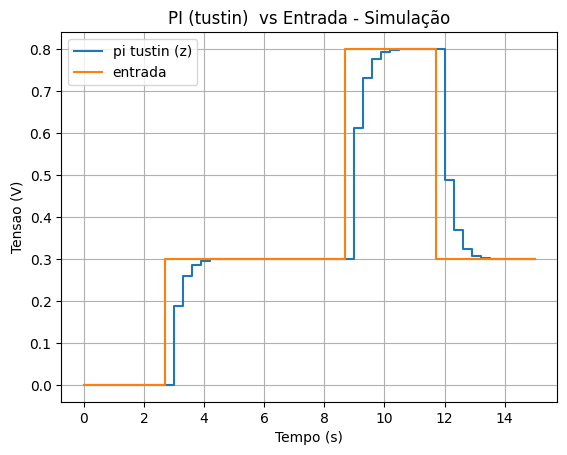

In [137]:
plt.step(t, simu_pi_tustinz)
plt.step(t, step15)
plt.title("PI (tustin)  vs Entrada - Simulação")
plt.xlabel("Tempo (s)")
plt.ylabel("Tensao (V)")
plt.legend(['pi tustin (z)', 'entrada'])
plt.grid(1)

plt.show()

#### Random com entrada

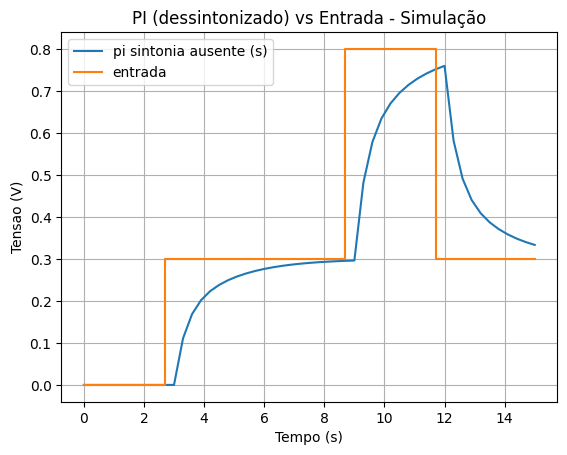

In [138]:
plt.plot(t, simu_pi_random_s)
plt.step(t, step15)
plt.title("PI (dessintonizado) vs Entrada - Simulação")
plt.xlabel("Tempo (s)")
plt.ylabel("Tensao (V)")
plt.legend(['pi sintonia ausente (s)', 'entrada'])
plt.grid(1)

plt.show()

#### S com entrada

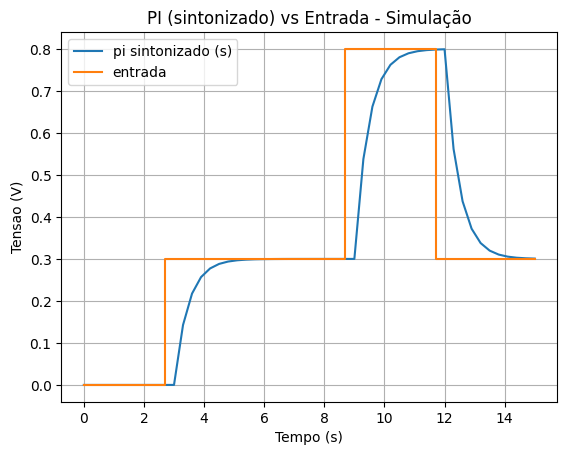

In [139]:
plt.plot(t, simu_pi_s)
plt.step(t, step15)
plt.title("PI (sintonizado) vs Entrada - Simulação")
plt.xlabel("Tempo (s)")
plt.ylabel("Tensao (V)")
plt.legend(['pi sintonizado (s)', 'entrada'])
plt.grid(1)

plt.show()

#### Arduino com entrada

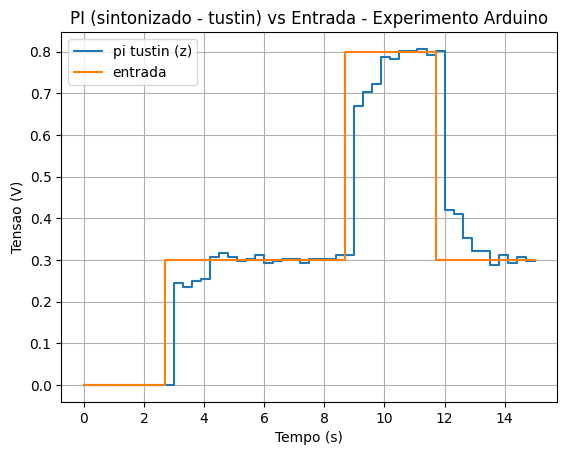

In [140]:
plt.step(t, exp_pi_tustinz)
plt.step(t, step15)
plt.title("PI (sintonizado - tustin) vs Entrada - Experimento Arduino")
plt.xlabel("Tempo (s)")
plt.ylabel("Tensao (V)")
plt.legend(['pi tustin (z)', 'entrada'])
plt.grid(1)

plt.show()

#### Todo mundo junto

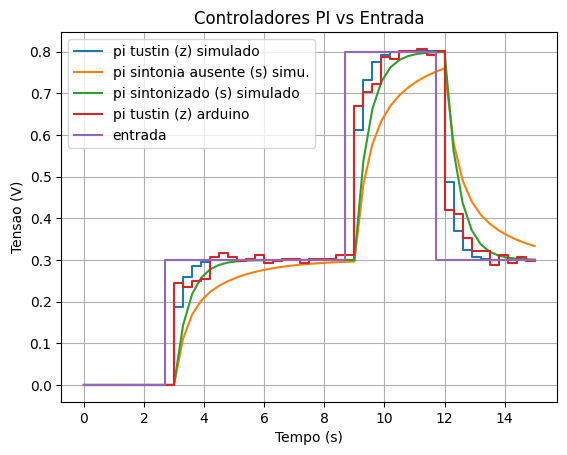

In [141]:
plt.step(t, simu_pi_tustinz)
plt.plot(t, simu_pi_random_s)
plt.plot(t, simu_pi_s)
plt.step(t, exp_pi_tustinz)
plt.step(t, step15)
plt.title("Controladores PI vs Entrada")
plt.xlabel("Tempo (s)")
plt.ylabel("Tensao (V)")
plt.legend([
    'pi tustin (z) simulado', 
    'pi sintonia ausente (s) simu.', 
    'pi sintonizado (s) simulado', 
    'pi tustin (z) arduino', 
    'entrada'
    ])
plt.grid(1)

plt.show()

### Gráficos Analog Controller

#### Vetor tempo (para gráfico)

In [142]:
t = [.3 * i for i in range(0, 111)]

#### Z com entrada (mapeamento)

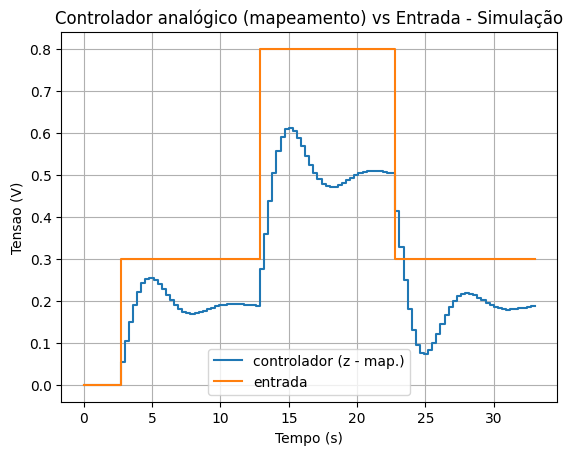

In [143]:
plt.step(t, simu_anag_mapz)
plt.step(t, step33)
plt.title("Controlador analógico (mapeamento) vs Entrada - Simulação")
plt.xlabel("Tempo (s)")
plt.ylabel("Tensao (V)")
plt.legend(['controlador (z - map.)', 'entrada'])
plt.grid(1)

plt.show()

#### Z com entrada (tustin)

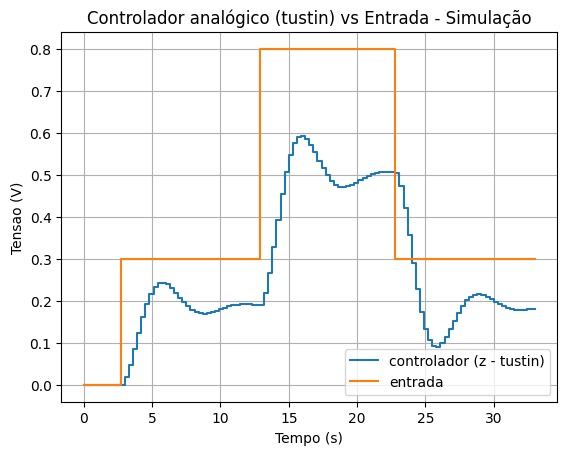

In [144]:
plt.step(t, simu_anag_tustinz)
plt.step(t, step33)
plt.title("Controlador analógico (tustin) vs Entrada - Simulação")
plt.xlabel("Tempo (s)")
plt.ylabel("Tensao (V)")
plt.legend(['controlador (z - tustin)', 'entrada'])
plt.grid(1)

plt.show()

#### S com entrada

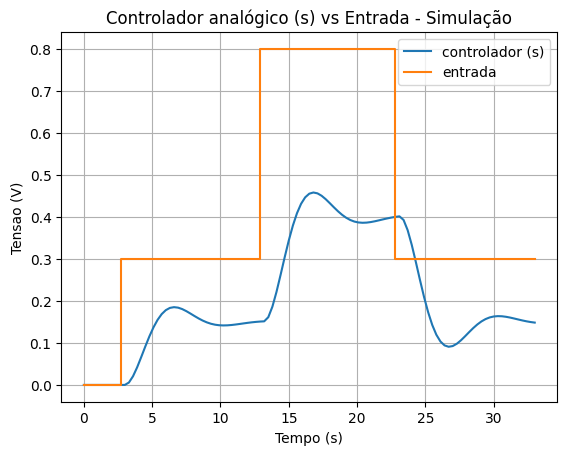

In [145]:
plt.plot(t, simu_anag_s)
plt.step(t, step33)
plt.title("Controlador analógico (s) vs Entrada - Simulação")
plt.xlabel("Tempo (s)")
plt.ylabel("Tensao (V)")
plt.legend(['controlador (s)', 'entrada'])
plt.grid(1)

plt.show()

#### Arduino com entrada (mapeamento)

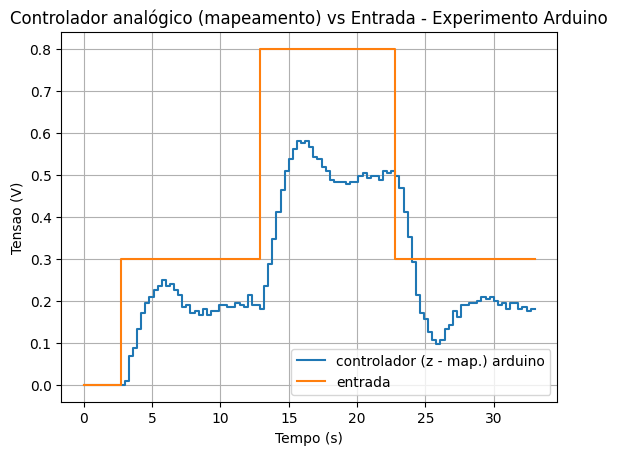

In [146]:
plt.step(t, exp_anag_mapz)
plt.step(t, step33)
plt.title("Controlador analógico (mapeamento) vs Entrada - Experimento Arduino")
plt.xlabel("Tempo (s)")
plt.ylabel("Tensao (V)")
plt.legend(['controlador (z - map.) arduino', 'entrada'])
plt.grid(1)

plt.show()

#### Arduino com entrada (tustin)

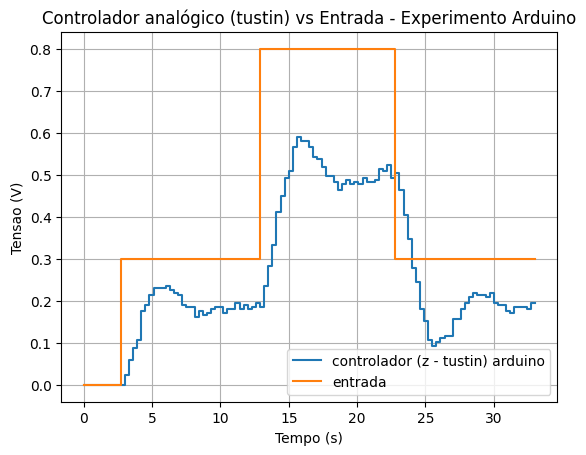

In [147]:
plt.step(t, exp_anag_tustinz)
plt.step(t, step33)
plt.title("Controlador analógico (tustin) vs Entrada - Experimento Arduino")
plt.xlabel("Tempo (s)")
plt.ylabel("Tensao (V)")
plt.legend(['controlador (z - tustin) arduino', 'entrada'])
plt.grid(1)

plt.show()

#### Todos juntos

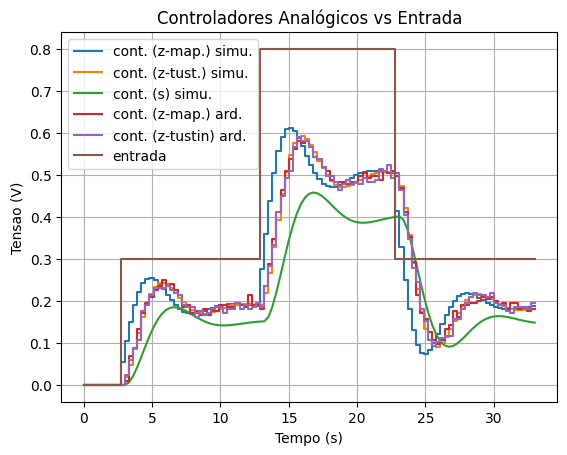

In [148]:
plt.step(t, simu_anag_mapz)
plt.step(t, simu_anag_tustinz)
plt.plot(t, simu_anag_s)
plt.step(t, exp_anag_mapz)
plt.step(t, exp_anag_tustinz)
plt.step(t, step33)
plt.title("Controladores Analógicos vs Entrada")
plt.xlabel("Tempo (s)")
plt.ylabel("Tensao (V)")
plt.legend([
        'cont. (z-map.) simu.', 
        'cont. (z-tust.) simu.', 
        'cont. (s) simu.', 
        'cont. (z-map.) ard.', 
        'cont. (z-tustin) ard.', 
        'entrada'
        ],
        loc='upper left')
plt.grid(1)

plt.show()

## Cálculo ITAE e IAE

In [151]:
def calcIAE_and_ITAE(func,set_point):
  cont = 0
  t = 0
  IAE = 0
  ITAE = 0
  old_setpoint = 0
  for i in func:
    erro = abs(func[cont]-set_point[cont])
    IAE += erro
    ITAE += erro*(t+0.3)
    if set_point[cont]>=0:
      t+=0.3
    if old_setpoint != set_point[cont]:
      t = 0
    old_setpoint = set_point[cont]
    cont+=1
  print(f"IAE = {IAE}, ITAE = {ITAE}")
  return IAE,ITAE

In [152]:
pi_z = simu_pi_tustinz
set_point = step15
ITAE,IAE = calcIAE_and_ITAE(pi_z,set_point)

IAE = 2.05638, ITAE = 5.838482999999998
